In [2]:
import matplotlib.pyplot as plt
import numpy as np

## Task 1 a

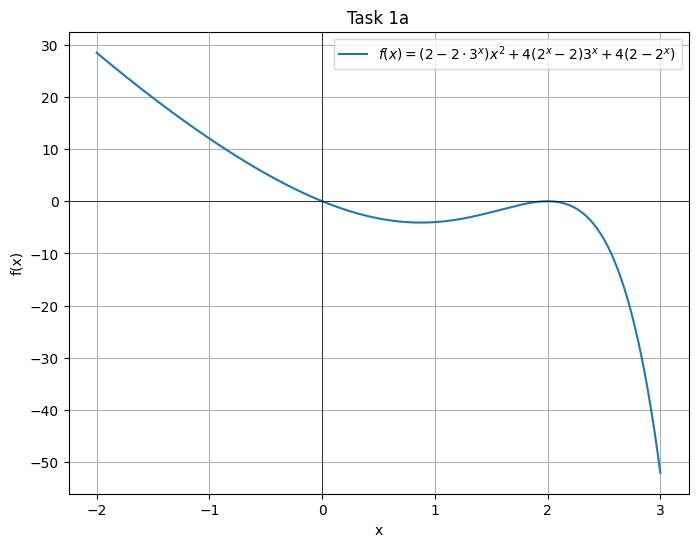

In [3]:
def f(x):
    return (2 - 2 * 3**x) * x**2 + 4 * (2 * x - 2) * 3**x + 4 * (2 - 2 * x)


x_vals = np.linspace(-2, 3, 500)
y_vals = f(x_vals)

# Create the plot
plt.figure(figsize=(8, 6))
plt.plot(x_vals,
         y_vals,
         label=r"$f(x) = (2 - 2 \cdot 3^x) x^2 + 4(2^x - 2)3^x + 4(2 - 2^x)$")
plt.axhline(0, color='black', linewidth=0.5)
plt.axvline(0, color='black', linewidth=0.5)
plt.title("Task 1a")
plt.xlabel("x")
plt.ylabel("f(x)")
plt.grid(True)
plt.legend()
plt.show()




## task 1 e

In [5]:
def bisection(f, a, b, tol=1e-4):
    if f(a) * f(b) >= 0:
        raise ValueError("f(a) and f(b) must have opposite signs to apply the bisection method.")
    
    # Start bisection algorithm
    while (b - a) / 2 > tol:
        mid = (a + b) / 2
        if f(mid) == 0:
            return mid
        elif f(a) * f(mid) < 0:
            b = mid
        else:
            a = mid
    
    return (a + b) / 2

a = -2
b = 3
tol = 1e-4

root = bisection(f, a, b, tol=tol)
root



4.57763671875e-05

![](./bisection_method.gif)


## Task 2 b

In [15]:
def g1(x):
    return np.sqrt(2 * x + 3)


def g2(x):
    return (x**2 - ![](./fixed_point_g1.gif)3) / 2


def g3(x):
    return 3 / (x - 2)


def fixed_point_iteration(g, x0, tol=1e-6, max_iterations=500):
    x_old = x0
    for k in range(max_iterations):
        try:
            x_new = g(x_old)
        except OverflowError:
            return None, max_iterations

        if abs(x_new - x_old) < tol:
            return x_new, k + 1

        x_old = x_new

    return None, max_iterations


x0 = 4

root_g1, iterations_g1 = fixed_point_iteration(g1, x0)
root_g2, iterations_g2 = fixed_point_iteration(g2, x0)
root_g3, iterations_g3 = fixed_point_iteration(g3, x0)

print(f"Root using g1: {root_g1}, Iterations: {iterations_g1}")
print(f"Root using g2: {root_g2}, Iterations: {iterations_g2}")
print(f"Root using g3: {root_g3}, Iterations: {iterations_g3}")

Root using g1: 3.0000001935533036, Iterations: 14
Root using g2: None, Iterations: 500
Root using g3: -0.9999998451295186, Iterations: 17


![](./fixed_point_g1.gif)
![](./fixed_point_g2.gif)
![](./fixed_point_g3.gif)

### g2 converges though extremly slowly if you start from 0.5
![](./fixed_point_g2_start_0.5.gif)


# Task 3 b

In [17]:
def f(x):
    return -x + np.cos(x)


def df(x):
    return -1 - np.sin(x)


def newton_method(x0, tol=1e-5, max_iter=100):
    x = x0
    for i in range(max_iter):
        fx = f(x)
        fpx = df(x)
        if fpx == 0:
            raise ValueError("Derivative is zero, Newton's method fails.")
        x_new = x - fx / fpx
        if abs(x_new - x) < tol:
            return i, x_new
        x = x_new
    raise ValueError("Did not converge")


x0 = 0.5
root, iteration = newton_method(x0)
print(f"Root: {root}, Iteration: {iteration}")


Root: 3, Iteration: 0.7390851332151607


![](./newtons_method.gif)
![](./bisection_vs_newtons.gif)